In [1]:
from sklearn.datasets import fetch_20newsgroups
import nltk
import matplotlib.pyplot as plt
from collections import defaultdict
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.metrics import mean_squared_error, mean_absolute_error


nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ksidorov\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ksidorov\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
def run_pipeline(text, top_n=10):
    # Токенизация
    tokens = word_tokenize(text)
    print(f"Count tokens after tokenisation: {len(tokens)}")
    clear_tokens = [token.lower() for token in tokens if token.isalpha()]
    print(f"Count of tokens after after normalization: {len(clear_tokens)}")
    # Удаление стоп-слов
    stop_words = stopwords.words("english")
    filtered_tokens = [token for token in clear_tokens if token not in stop_words]
    print(f"Count of tokens after deletion stop words: {len(filtered_tokens)}")
    # стемминг
    sno = SnowballStemmer('english')
    stemming_tokens = [sno.stem(token) for token in filtered_tokens]
    count_words = len(stemming_tokens)
    # частота слов
    words_freq = defaultdict(int)
    for token in stemming_tokens:
        words_freq[token] += 1
    print(f"Count of unique tokens: {len(words_freq)}")
    # plot Cipth graph
    words_freq = sorted(words_freq.items(), key=lambda value: value[1])
    print(f'Top {top_n} words in text: ')
    for idx, word_freq in enumerate(words_freq[-top_n:]):
        print(f"{top_n - idx}) {word_freq}")
    words_prob = [word_count / count_words for _, word_count in words_freq]
    sorted_set_words_prob = sorted(list(set(words_prob)), reverse=True)
    max_prob = sorted_set_words_prob[0]
    zipf_law_ditrib = []

    for idx, value in enumerate(sorted_set_words_prob):
        zipf_law_ditrib.append(max_prob / (idx + 1))

    print('Metrics:')
    print(f'1) mean_squared_error = {mean_squared_error(sorted_set_words_prob, zipf_law_ditrib)}')
    print(f'2) mean_absolute_error = {mean_absolute_error(sorted_set_words_prob, zipf_law_ditrib)}')

    plt.plot(sorted_set_words_prob, color='b', label="Real value")
    plt.plot(zipf_law_ditrib, color='r', label="Zipf's law")
    plt.xlabel('Место слова в частотносм словаре (ранг)')
    plt.ylabel('Частота встречаемости слова')
    plt.legend()
    plt.show();

Выполнить обработку текста с использованием специализированных библиотек, например, nltk. Выполнить этапы обработки текста: декодирование, токенизация, удаление стоп-слов, нормализация стемминг. Оценить изменение количества слов после каждого этапа. 

Вычислить вероятности вхождения каждого токена. Нарисовать график вероятностей токенов, упорядоченных по убыванию аналогичный рисунку 1. (можно использовать логарифмическую шкалу). Нарисовать кривую распределения частот по закону Ципфа. Оценить их сходство, используя различные метрики, например, среднеквадратичное отклонение. 


Uayt_Charlotte-s-Web_RuLit_Net.txt
Count tokens after tokenisation: 42151
Count of tokens after after normalization: 32554
Count of tokens after deletion stop words: 16413
Count of unique tokens: 2485
Top 10 words in text: 
10) ('look', 108)
9) ('arabl', 113)
8) ('go', 122)
7) ('web', 126)
6) ('pig', 167)
5) ('fern', 172)
4) ('zuckerman', 186)
3) ('charlott', 249)
2) ('said', 379)
1) ('wilbur', 474)
Metrics:
1) mean_squared_error = 6.49956426187508e-06
2) mean_absolute_error = 0.002019748396870186


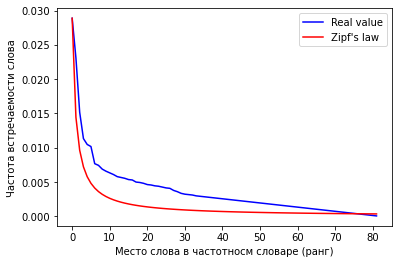

Rouling_Harry_Potter_1_Harry_Potter_and_the_Sorcerers_Stone_RuLit_Net.txt
Count tokens after tokenisation: 99246
Count of tokens after after normalization: 77549
Count of tokens after deletion stop words: 38889
Count of unique tokens: 3995
Top 10 words in text: 
10) ('get', 231)
9) ('one', 253)
8) ('go', 254)
7) ('back', 256)
6) ('hermion', 265)
5) ('hagrid', 365)
4) ('look', 400)
3) ('ron', 420)
2) ('said', 790)
1) ('harri', 1295)
Metrics:
1) mean_squared_error = 1.8527159934338136e-06
2) mean_absolute_error = 0.0011347662582344778


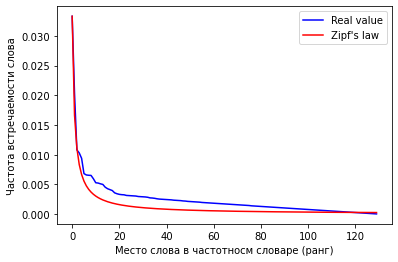

science.txt
Count tokens after tokenisation: 3522
Count of tokens after after normalization: 2936
Count of tokens after deletion stop words: 1792
Count of unique tokens: 687
Top 10 words in text: 
10) ('monitor', 16)
9) ('artifici', 19)
8) ('clinic', 19)
7) ('technolog', 20)
6) ('physician', 20)
5) ('ai', 20)
4) ('intellig', 24)
3) ('patient', 28)
2) ('medicin', 31)
1) ('medic', 33)
Metrics:
1) mean_squared_error = 2.6842823581257623e-05
2) mean_absolute_error = 0.004317247431585581


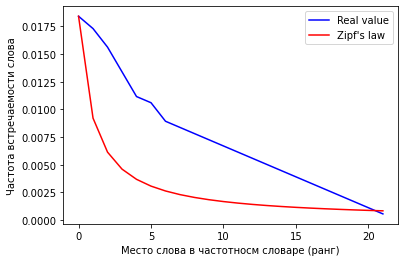

In [3]:
# Декодирование
filename = "Uayt_Charlotte-s-Web_RuLit_Net.txt"
with open(filename, "r") as file:
    text = file.read()
print(filename)
run_pipeline(text)

filename = "Rouling_Harry_Potter_1_Harry_Potter_and_the_Sorcerers_Stone_RuLit_Net.txt"
with open(filename, "r") as file:
    text = file.read()
print(filename)
run_pipeline(text)

filename = "science.txt"
with open(filename, "r", encoding="utf8") as file:
    text = file.read()
print(filename)
run_pipeline(text)